In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv("data/data_merged_encoded.csv")
data

,FIPS,2024 Urban Influence Code,"Percent of adults who are not high school graduates, 2019-23","Percent of adults who are high school graduates (or equivalent), 2019-23","Percent of adults completing some college or associate degree, 2019-23","Percent of adults with a bachelor's degree or higher, 2019-23",Economic_typology_2015,NATURAL_CHG_2023,DOMESTIC_MIG_2023,R_BIRTH_2023,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,1001,-0.426905,-0.278537,-0.151198,-0.297658,0.418089,-0.995489,-0.051421,0.125382,0.480823,...,False,False,False,False,False,False,False,False,False,False
1,1003,-0.426905,-0.543725,-0.822225,0.096189,0.862459,1.754927,-0.205564,1.747120,-0.246254,...,False,False,False,False,False,False,False,False,False,False
2,1005,-0.037317,1.997280,0.493048,-0.407219,-1.237164,0.654761,-0.185724,-0.012310,0.036498,...,False,False,False,False,False,False,False,False,False,False
3,1007,-1.595670,1.536006,0.953446,-0.597235,-1.236820,-0.995489,-0.160542,-0.018475,0.076891,...,False,False,False,False,False,False,False,False,False,False
4,1009,-1.595670,1.105865,0.233289,0.116699,-0.832226,-0.995489,-0.181909,0.091216,0.400036,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,56037,0.741860,-0.689741,-0.351006,1.924569,-0.360120,0.104677,-0.073551,-0.046990,-0.125074,...,False,False,False,False,False,False,False,False,False,True
3128,56039,0.741860,-1.534765,-2.311755,-2.108917,3.659809,1.754927,-0.046079,-0.057523,-1.013723,...,False,False,False,False,False,False,False,False,False,True
3129,56041,0.741860,-1.068681,0.281985,1.219039,-0.267269,0.104677,-0.086523,-0.006659,0.117285,...,False,False,False,False,False,False,False,False,False,True
3130,56043,1.521036,-0.486824,-0.466029,1.565607,-0.197078,-0.995489,-0.150622,0.005672,-0.569399,...,False,False,False,False,False,False,False,False,False,True


In [19]:
filtered = data.drop(['State_AK', 'State_AL',
       'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL',
       'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD',
       'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT',
       'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM',
       'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA',
       'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT',
       'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY'], axis=1)
filtered.set_index('FIPS', inplace=True)
filtered

,2024 Urban Influence Code,"Percent of adults who are not high school graduates, 2019-23","Percent of adults who are high school graduates (or equivalent), 2019-23","Percent of adults completing some college or associate degree, 2019-23","Percent of adults with a bachelor's degree or higher, 2019-23",Economic_typology_2015,NATURAL_CHG_2023,DOMESTIC_MIG_2023,R_BIRTH_2023,R_NATURAL_CHG_2023,R_INTERNATIONAL_MIG_2023,R_DOMESTIC_MIG_2023,MEDHHINC_2023,PCTPOVALL_2023,Employed_2023,Unemployment_rate_2023
FIPS,,,,,,,,,,,,,,,,
1001,-0.426905,-0.278537,-0.151198,-0.297658,0.418089,-0.995489,-0.051421,0.125382,0.480823,0.781117,-0.333898,0.359741,0.205146,-0.505364,-0.147065,-1.137550
1003,-0.426905,-0.543725,-0.822225,0.096189,0.862459,1.754927,-0.205564,1.747120,-0.246254,0.374123,-0.052500,1.866632,0.532121,-0.811439,0.310732,-1.055631
1005,-0.037317,1.997280,0.493048,-0.407219,-1.237164,0.654761,-0.185724,-0.012310,0.036498,-0.268497,-0.380797,-0.433359,-1.223756,1.979240,-0.260981,0.664661
1007,-1.595670,1.536006,0.953446,-0.597235,-1.236820,-0.995489,-0.160542,-0.018475,0.076891,-0.032870,-0.615296,-0.536462,-0.573141,0.880973,-0.255145,-0.891794
1009,-1.595670,1.105865,0.233289,0.116699,-0.832226,-0.995489,-0.181909,0.091216,0.400036,0.181337,-0.427697,0.185259,-0.031094,-0.307316,-0.153887,-1.219469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,0.741860,-0.689741,-0.351006,1.924569,-0.360120,0.104677,-0.073551,-0.046990,-0.125074,0.781117,-0.755994,-0.639565,0.665192,-0.811439,-0.188437,-0.236445
56039,0.741860,-1.534765,-2.311755,-2.108917,3.659809,1.754927,-0.046079,-0.057523,-1.013723,1.380896,0.510296,-1.044046,3.923056,-1.495605,-0.204298,-1.219469
56041,0.741860,-1.068681,0.281985,1.219039,-0.267269,0.104677,-0.086523,-0.006659,0.117285,0.952482,-0.755994,-0.377842,0.825556,-0.757425,-0.253626,-0.318363


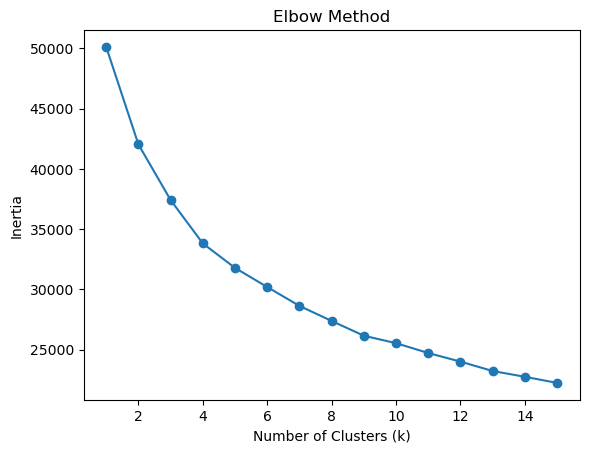

In [20]:
inertia = []
k_range = range(1, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(filtered)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(filtered)

filtered['cluster'] = clusters

In [22]:
cluster_sizes = filtered['cluster'].value_counts()

# Display cluster sizes
print(cluster_sizes)

cluster
1    1568
2    1039
0     501
3      24
Name: count, dtype: int64


In [23]:
filtered

,2024 Urban Influence Code,"Percent of adults who are not high school graduates, 2019-23","Percent of adults who are high school graduates (or equivalent), 2019-23","Percent of adults completing some college or associate degree, 2019-23","Percent of adults with a bachelor's degree or higher, 2019-23",Economic_typology_2015,NATURAL_CHG_2023,DOMESTIC_MIG_2023,R_BIRTH_2023,R_NATURAL_CHG_2023,R_INTERNATIONAL_MIG_2023,R_DOMESTIC_MIG_2023,MEDHHINC_2023,PCTPOVALL_2023,Employed_2023,Unemployment_rate_2023,cluster
FIPS,,,,,,,,,,,,,,,,,
1001,-0.426905,-0.278537,-0.151198,-0.297658,0.418089,-0.995489,-0.051421,0.125382,0.480823,0.781117,-0.333898,0.359741,0.205146,-0.505364,-0.147065,-1.137550,1
1003,-0.426905,-0.543725,-0.822225,0.096189,0.862459,1.754927,-0.205564,1.747120,-0.246254,0.374123,-0.052500,1.866632,0.532121,-0.811439,0.310732,-1.055631,1
1005,-0.037317,1.997280,0.493048,-0.407219,-1.237164,0.654761,-0.185724,-0.012310,0.036498,-0.268497,-0.380797,-0.433359,-1.223756,1.979240,-0.260981,0.664661,2
1007,-1.595670,1.536006,0.953446,-0.597235,-1.236820,-0.995489,-0.160542,-0.018475,0.076891,-0.032870,-0.615296,-0.536462,-0.573141,0.880973,-0.255145,-0.891794,2
1009,-1.595670,1.105865,0.233289,0.116699,-0.832226,-0.995489,-0.181909,0.091216,0.400036,0.181337,-0.427697,0.185259,-0.031094,-0.307316,-0.153887,-1.219469,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,0.741860,-0.689741,-0.351006,1.924569,-0.360120,0.104677,-0.073551,-0.046990,-0.125074,0.781117,-0.755994,-0.639565,0.665192,-0.811439,-0.188437,-0.236445,1
56039,0.741860,-1.534765,-2.311755,-2.108917,3.659809,1.754927,-0.046079,-0.057523,-1.013723,1.380896,0.510296,-1.044046,3.923056,-1.495605,-0.204298,-1.219469,0
56041,0.741860,-1.068681,0.281985,1.219039,-0.267269,0.104677,-0.086523,-0.006659,0.117285,0.952482,-0.755994,-0.377842,0.825556,-0.757425,-0.253626,-0.318363,1


In [110]:
recommend_similar_counties(1001, filtered)

'FIPS code 1001 not found.'

In [26]:
import geopandas as gpd
import json

gdf = gpd.read_file('data/counties_2023.geojson')
gdf = gdf.to_crs('EPSG:4326')
plotly_geojson = json.loads(gdf.set_index('GEOID').to_json())

In [27]:
# Load and prepare mapping file
fips_mapping = pd.read_csv('data/FipsCountyCodes.csv')
fips_mapping['FIPS'] = fips_mapping['FIPS'].astype(str)

final_df = filtered
# Make sure filtered's index is also string
final_df.index = final_df.index.astype(str)

# Merge using index and keep FIPS as index
final_df = final_df.merge(fips_mapping[['FIPS', 'Name']], left_index=True, right_on='FIPS', how='left')

# Optionally drop the duplicate 'FIPS' column after merge
final_df.set_index('FIPS', inplace=True)

In [28]:
final_df

,2024 Urban Influence Code,"Percent of adults who are not high school graduates, 2019-23","Percent of adults who are high school graduates (or equivalent), 2019-23","Percent of adults completing some college or associate degree, 2019-23","Percent of adults with a bachelor's degree or higher, 2019-23",Economic_typology_2015,NATURAL_CHG_2023,DOMESTIC_MIG_2023,R_BIRTH_2023,R_NATURAL_CHG_2023,R_INTERNATIONAL_MIG_2023,R_DOMESTIC_MIG_2023,MEDHHINC_2023,PCTPOVALL_2023,Employed_2023,Unemployment_rate_2023,cluster,Name
FIPS,,,,,,,,,,,,,,,,,,
1001,-0.426905,-0.278537,-0.151198,-0.297658,0.418089,-0.995489,-0.051421,0.125382,0.480823,0.781117,-0.333898,0.359741,0.205146,-0.505364,-0.147065,-1.137550,1,"AL, Autauga"
1003,-0.426905,-0.543725,-0.822225,0.096189,0.862459,1.754927,-0.205564,1.747120,-0.246254,0.374123,-0.052500,1.866632,0.532121,-0.811439,0.310732,-1.055631,1,"AL, Baldwin"
1005,-0.037317,1.997280,0.493048,-0.407219,-1.237164,0.654761,-0.185724,-0.012310,0.036498,-0.268497,-0.380797,-0.433359,-1.223756,1.979240,-0.260981,0.664661,2,"AL, Barbour"
1007,-1.595670,1.536006,0.953446,-0.597235,-1.236820,-0.995489,-0.160542,-0.018475,0.076891,-0.032870,-0.615296,-0.536462,-0.573141,0.880973,-0.255145,-0.891794,2,"AL, Bibb"
1009,-1.595670,1.105865,0.233289,0.116699,-0.832226,-0.995489,-0.181909,0.091216,0.400036,0.181337,-0.427697,0.185259,-0.031094,-0.307316,-0.153887,-1.219469,1,"AL, Blount"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,0.741860,-0.689741,-0.351006,1.924569,-0.360120,0.104677,-0.073551,-0.046990,-0.125074,0.781117,-0.755994,-0.639565,0.665192,-0.811439,-0.188437,-0.236445,1,"WY, Sweetwater"
56039,0.741860,-1.534765,-2.311755,-2.108917,3.659809,1.754927,-0.046079,-0.057523,-1.013723,1.380896,0.510296,-1.044046,3.923056,-1.495605,-0.204298,-1.219469,0,"WY, Teton"
56041,0.741860,-1.068681,0.281985,1.219039,-0.267269,0.104677,-0.086523,-0.006659,0.117285,0.952482,-0.755994,-0.377842,0.825556,-0.757425,-0.253626,-0.318363,1,"WY, Uinta"


In [11]:
cluster_sizes = final_df['cluster'].value_counts()

# Display cluster sizes
print(cluster_sizes)

cluster
1    1568
2    1039
0     501
3      24
Name: count, dtype: int64


In [12]:
final_df[final_df.index.to_series().astype(int).between(6000, 6999)]["Name"].to_list()

['CA, Alameda',
 'CA, Alpine',
 'CA, Amador',
 'CA, Butte',
 'CA, Calaveras',
 'CA, Colusa',
 'CA, Contra Costa',
 'CA, Del Norte',
 'CA, El Dorado',
 'CA, Fresno',
 'CA, Glenn',
 'CA, Humboldt',
 'CA, Imperial',
 'CA, Inyo',
 'CA, Kern',
 'CA, Kings',
 'CA, Lake',
 'CA, Lassen',
 'CA, Los Angeles',
 'CA, Madera',
 'CA, Marin',
 'CA, Mariposa',
 'CA, Mendocino',
 'CA, Merced',
 'CA, Modoc',
 'CA, Mono',
 'CA, Monterey',
 'CA, Napa',
 'CA, Nevada',
 'CA, Orange',
 'CA, Placer',
 'CA, Plumas',
 'CA, Riverside',
 'CA, Sacramento',
 'CA, San Benito',
 'CA, San Bernardino',
 'CA, San Diego',
 'CA, San Francisco',
 'CA, San Joaquin',
 'CA, San Luis Obispo',
 'CA, San Mateo',
 'CA, Santa Barbara',
 'CA, Santa Clara',
 'CA, Santa Cruz',
 'CA, Shasta',
 'CA, Sierra',
 'CA, Siskiyou',
 'CA, Solano',
 'CA, Sonoma',
 'CA, Stanislaus',
 'CA, Sutter',
 'CA, Tehama',
 'CA, Trinity',
 'CA, Tulare',
 'CA, Tuolumne',
 'CA, Ventura',
 'CA, Yolo',
 'CA, Yuba']

In [29]:
import plotly.io as pio
pio.renderers.default = "browser"

# run this so it doesn't crash

In [31]:
import plotly.express as px

# Make sure FIPS is a string with 5 digits in the index
final_df.index = final_df.index.astype(str).str.zfill(5)

# Ensure cluster column is string type
final_df['cluster'] = final_df['cluster'].astype(str)

# Sort by cluster for better color grouping
final_df = final_df.sort_values(by='cluster')

# Add FIPS as a column for plotting (Plotly requires a column for `locations`)
filtered_plot = final_df.copy()
filtered_plot["FIPS"] = filtered_plot.index

# Create choropleth
fig = px.choropleth(
    filtered_plot,
    geojson=plotly_geojson,
    locations='FIPS',
    color='cluster',
    color_discrete_sequence=px.colors.qualitative.Plotly,
    scope="usa",
    hover_name='Name',
    title='US County Clusters'
)

fig.update_geos(
    visible=False,
    bgcolor='rgba(0,0,0,0)'
)

fig.update_traces(
    marker_line_width=0.1,
    marker_opacity=0.8,
    hovertemplate="<b>%{customdata[0]}</b><br>" +
                  "FIPS: %{location}<br>" +
                  "Cluster: %{customdata[1]}<extra></extra>",
    customdata=filtered_plot[['Name', 'cluster']].values
)

fig.update_layout(
    height=600,
    width=1000,
    margin={"r": 0, "t": 40, "l": 0, "b": 0},
    legend_title_text='Cluster'
)

fig.show()


In [36]:
# output is going to be on browser

In [24]:
def recommend_similar_counties(fips_code, df, n=5):
    if fips_code not in df.index:
        return f"FIPS code {fips_code} not found."
    
    cluster_id = df.loc[fips_code, 'cluster']
    
    # Get counties in the same cluster, excluding the input county
    same_cluster = df[df['cluster'] == cluster_id].drop(fips_code)
    
    # Optional: rank by similarity using Euclidean distance on features
    features = df.columns.difference(['cluster'])
    distances = ((same_cluster[features] - df.loc[fips_code, features])**2).sum(axis=1)
    
    recommendations = distances.sort_values().head(n).index.tolist()
    
    return recommendations

In [25]:
recommend_similar_counties(56039, final_df)

'FIPS code 56039 not found.'